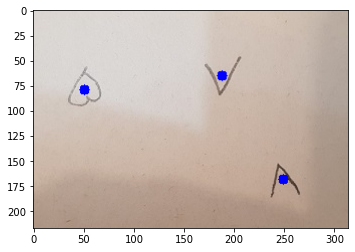

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('adad.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to binarize the image
binary_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Loop through each contour found to calculate the area and solidity (soliditiy baraye ratio)
for i, c in enumerate(contours):
    
    area = cv2.contourArea(c)
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    solidity = area / hull_area if hull_area > 0 else 0

    # Filter
    if 90 < area < 1000 and 0.1 < solidity < 1.0 and hierarchy[0][i][3] == -1: # hierarchy valuable when dealing with nested or overlapping contours
        M = cv2.moments(c)
        # Using the moments to calculate the centroid of the contour
        if M["m00"] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            # Mark the center with a circle
            cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)

plt.imshow(image[...,::-1])
plt.show()

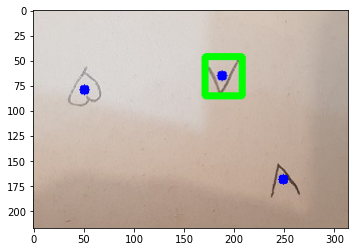

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables to keep track of the top-right contour
top_right_contour = None
top_right_point = (0, float('inf'))  # (x, y)

# Loop through each contour to find the top-right contour
for i, c in enumerate(contours):
    # Filter out small contours
    if cv2.contourArea(c) < 100:
        continue

    x, y, w, h = cv2.boundingRect(c)
    top_left = (x, y)
    bottom_right = (x + w, y + h)

    # Check if the current contour is the top-right
    if top_left[1] < top_right_point[1] or (top_left[1] == top_right_point[1] and bottom_right[0] > top_right_point[0]):
        top_right_point = (bottom_right[0], top_left[1])  # Rightmost x, highest y
        top_right_contour = c

# Draw a rectangle around the top-right contour
if top_right_contour is not None:
    x, y, w, h = cv2.boundingRect(top_right_contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 5)

# Convert image to RGB before displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()


##In your original code, you calculated the centroid of each contour with these lines:

Python

M = cv2.moments(c)
if M["m00"] != 0:
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
AI-generated code. Review and use carefully. More info on FAQ.
And then you used these centroid coordinates (cx, cy) to determine the “highest” and “rightmost” contours.

In the modified code, instead of using the centroid, we used the bounding rectangle of each contour to find the “highest” and “rightmost” points. This was done with these lines:

Python

x, y, w, h = cv2.boundingRect(c)
top_left = (x, y)
bottom_right = (x + w, y + h)
AI-generated code. Review and use carefully. More info on FAQ.
Here, x and y are the coordinates of the top-left corner of the bounding rectangle, and x + w and y + h are the coordinates of the bottom-right corner. We then used these points to determine the “highest” (smallest y) and “rightmost” (largest x) contours.

This change was necessary because the centroid is not always the highest or rightmost point of a contour, especially for contours that are not roughly circular. The bounding rectangle provides a more accurate representation of the extent of the contour. I hope this clarifies things!